In [1]:
import torch
import torchvision as torchv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import Tensor
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np



In [2]:
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0].parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

import lossFunctions

CROSS ENTROPY LOSS

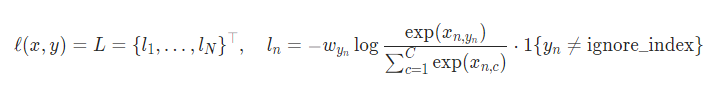

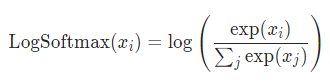

In [3]:
def zeroOneLoss(outputs, labels):
    return [1 if x[y] > 0 else 0 for x,y in zip(outputs ,labels)]

In [4]:
xList = torch.randn(3, 2, requires_grad=True)
yList = torch.empty(3, dtype=torch.long).random_(2)

print(xList)
print(yList)
print([1 if x[y] > 0 else 0 for x,y in zip(xList ,yList)])
print(yList == 1)

tensor([[-0.6830,  0.2630],
        [ 0.2903,  0.6469],
        [ 0.0564, -0.6257]], requires_grad=True)
tensor([0, 0, 1])
[0, 1, 0]
tensor([False, False,  True])


In [5]:
y_true = torch.randn(10, 2, requires_grad=True)
print(y_true)
print(torch.max(y_true, dim=1)[1])

tensor([[-0.2238, -1.8260],
        [ 1.0340, -0.0931],
        [ 0.0842,  1.2075],
        [-0.0238,  0.2515],
        [ 0.1612,  0.1864],
        [ 2.0132,  0.1845],
        [-1.1881,  0.3898],
        [-1.4960,  1.0290],
        [-0.7762,  0.2164],
        [ 1.1543,  0.0244]], requires_grad=True)
tensor([0, 0, 1, 1, 1, 0, 1, 1, 1, 0])


In [6]:
classes = 2
numberOfInput = 10

input = torch.randn(numberOfInput, classes, requires_grad=True)
target = torch.empty(numberOfInput, dtype=torch.long).random_(classes)


print('input: ', input)
print('target: ', target)

print("==========")
cross_entropy_loss = nn.CrossEntropyLoss()
customloss = lossFunctions.CustomLoss(5)
test = nn.MultiMarginLoss()

output = cross_entropy_loss(input, target)
output2 = customloss(input, target)
output4 = test(input, target)

output.backward()
output2.backward()
output4.backward()


print('output standard: ', output)
print('output customloss: ', output2)
print('output multimargin: ', output4)

input:  tensor([[ 0.5968, -0.2397],
        [ 0.1413, -1.2997],
        [ 0.5488,  0.2799],
        [-0.0267, -1.2238],
        [ 0.1937,  0.2641],
        [-0.5992,  0.1561],
        [ 0.3656, -0.2761],
        [ 2.2671,  0.9105],
        [-0.6920,  0.1197],
        [-0.2242, -1.0663]], requires_grad=True)
target:  tensor([0, 1, 1, 1, 1, 0, 0, 0, 0, 1])
output standard:  tensor(0.9142, grad_fn=<NllLossBackward0>)
output customloss:  tensor(0.9670, grad_fn=<DivBackward0>)
output multimargin:  tensor(0.6384, grad_fn=<MultiMarginLossBackward0>)


In [7]:
input = torch.FloatTensor([[100.0, 0.0]])
target = torch.LongTensor([0])
input.requires_grad_()
exp = torch.exp(input)
print("=======", torch.sum(exp, 1, keepdim=True))
print(exp/torch.sum(exp, 1, keepdim=True))
print("=======",torch.log(exp/torch.sum(exp, 1, keepdim=True)))

print('input: ', input)
print('target: ', target)
output = customloss(input, target)
output.backward()
print('output standard: ', output)

======= tensor([[inf]], grad_fn=<SumBackward1>)
tensor([[nan, 0.]], grad_fn=<DivBackward0>)
======= tensor([[nan, -inf]], grad_fn=<LogBackward0>)
input:  tensor([[100.,   0.]], requires_grad=True)
target:  tensor([0])
output standard:  tensor(0.0780, grad_fn=<DivBackward0>)


In [8]:
x = torch.linspace(1,10,10)
y = torch.zeros(10)
print(x, "===", y)
print(torch.stack((x,y),1))

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]) === tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([[ 1.,  0.],
        [ 2.,  0.],
        [ 3.,  0.],
        [ 4.,  0.],
        [ 5.,  0.],
        [ 6.,  0.],
        [ 7.,  0.],
        [ 8.,  0.],
        [ 9.,  0.],
        [10.,  0.]])


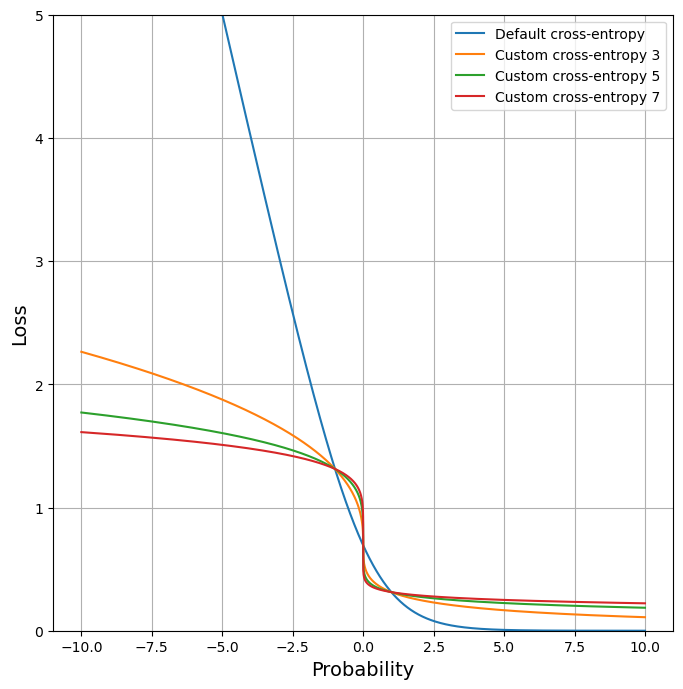

In [9]:
loss0 = nn.CrossEntropyLoss()
loss1 = lossFunctions.CustomLoss(3)
loss2 = lossFunctions.CustomLoss(5)
loss3 = lossFunctions.CustomLoss(7)
sigmoid = nn.Sigmoid()

result0 = []
result1 = []
result2 = []
result3 = []
rnge =  np.arange(-10,10,0.001)
for i in rnge:
    result0.append(loss0(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
    result1.append(loss1(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
    result2.append(loss2(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
    result3.append(loss3(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
plt.figure(figsize=(8,8))
plt.plot((torch.tensor(rnge)), result0, label="Default cross-entropy")
plt.plot((torch.tensor(rnge)), result1, label="Custom cross-entropy 3")
plt.plot((torch.tensor(rnge)), result2, label="Custom cross-entropy 5")
plt.plot((torch.tensor(rnge)), result3, label="Custom cross-entropy 7")
# print(list(m((torch.tensor(rnge)))))
plt.ylim(0, 5)
plt.grid(True)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.show()

In [10]:
lossFunctions.testSoftmax(torch.FloatTensor([[
        loss1(torch.FloatTensor([[i, 0]]),
               torch.LongTensor([0])), 0]])
               ,3)[0].data[0]

tensor(0.6175)

[tensor(0.7880), tensor(0.7880), tensor(0.7880), tensor(0.7880), tensor(0.7880), tensor(0.7879), tensor(0.7879), tensor(0.7879), tensor(0.7879), tensor(0.7878), tensor(0.7878), tensor(0.7878), tensor(0.7878), tensor(0.7878), tensor(0.7877), tensor(0.7877), tensor(0.7877), tensor(0.7877), tensor(0.7877), tensor(0.7876), tensor(0.7876), tensor(0.7876), tensor(0.7876), tensor(0.7876), tensor(0.7875), tensor(0.7875), tensor(0.7875), tensor(0.7875), tensor(0.7874), tensor(0.7874), tensor(0.7874), tensor(0.7874), tensor(0.7874), tensor(0.7873), tensor(0.7873), tensor(0.7873), tensor(0.7873), tensor(0.7873), tensor(0.7872), tensor(0.7872), tensor(0.7872), tensor(0.7872), tensor(0.7871), tensor(0.7871), tensor(0.7871), tensor(0.7871), tensor(0.7871), tensor(0.7870), tensor(0.7870), tensor(0.7870), tensor(0.7870), tensor(0.7870), tensor(0.7869), tensor(0.7869), tensor(0.7869), tensor(0.7869), tensor(0.7868), tensor(0.7868), tensor(0.7868), tensor(0.7868), tensor(0.7868), tensor(0.7867), tensor(

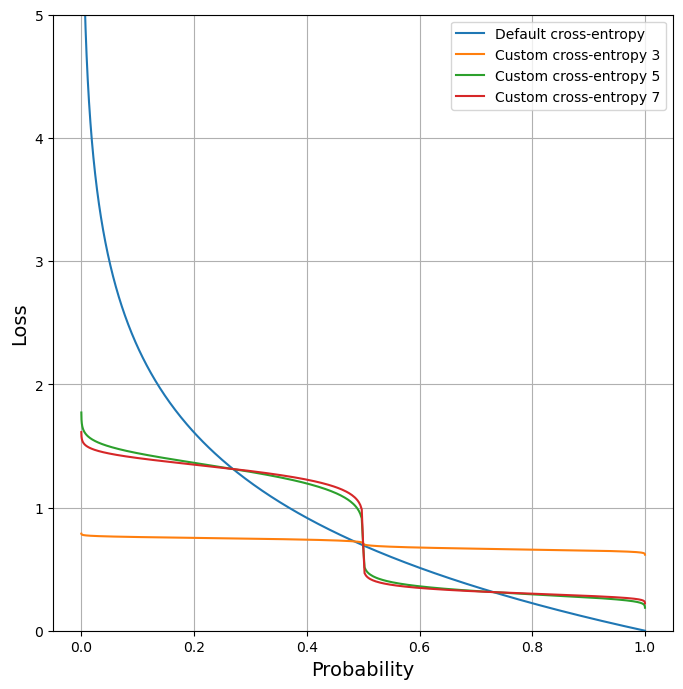

In [14]:
loss0 = nn.CrossEntropyLoss()
loss1 = lossFunctions.CustomLoss(3)
loss2 = lossFunctions.CustomLoss(5)
loss3 = lossFunctions.CustomLoss(7)
sigmoid = nn.Sigmoid()

result0 = []
result1 = []
result2 = []
result3 = []
rnge =  np.arange(-10,10,0.01)
for i in rnge:
    result0.append(loss0(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
    result1.append(lossFunctions.sigmoid(loss1(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])),3))
    result2.append(loss2(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
    result3.append(loss3(torch.FloatTensor([[i, 0]]), torch.LongTensor([0])))
plt.figure(figsize=(8,8))
print(result1)
plt.plot(sigmoid(torch.tensor(rnge)), result0, label="Default cross-entropy")
plt.plot(sigmoid(torch.tensor(rnge)), result1, label="Custom cross-entropy 3")
plt.plot(sigmoid(torch.tensor(rnge)), result2, label="Custom cross-entropy 5")
plt.plot(sigmoid(torch.tensor(rnge)), result3, label="Custom cross-entropy 7")
# print(list(m((torch.tensor(rnge)))))
plt.ylim(0, 5)
plt.grid(True)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.show()

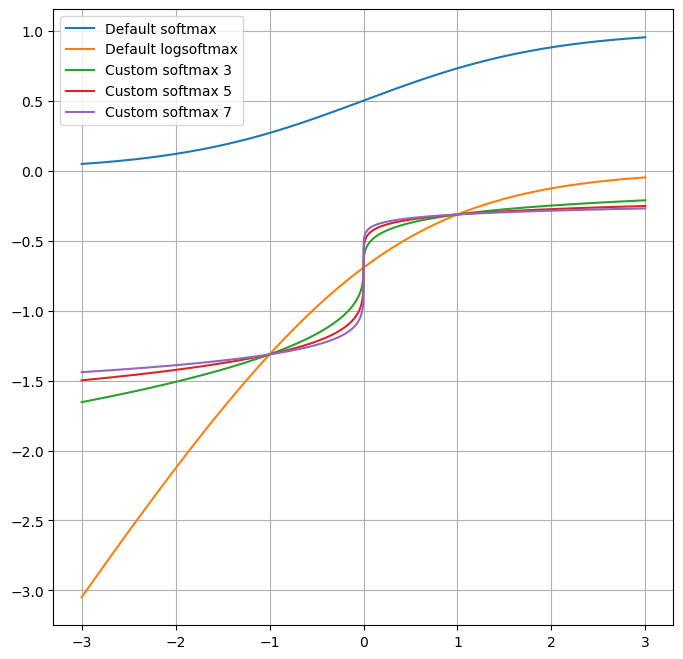

In [12]:
defaultSoftMax = nn.Softmax(dim=1)
defaultLogSoftMax = nn.LogSoftmax(dim=1)
result0 = []
result1 = []
result2 = []
result3 = []
result4 = []
result5 = []
rnge =  np.arange(-3,3,0.001)
for i in rnge:
    result0.append(defaultSoftMax(torch.FloatTensor([[i, 0]]))[0].data[0])
    result1.append(defaultLogSoftMax(torch.FloatTensor([[i, 0]]))[0].data[0])
    result2.append(lossFunctions.logSoftmax(torch.FloatTensor([[i, 0]]), 3)[0].data[0])
    result3.append(lossFunctions.logSoftmax(torch.FloatTensor([[i, 0]]), 5)[0].data[0])
    result4.append(lossFunctions.logSoftmax(torch.FloatTensor([[i, 0]]), 7)[0].data[0])
    
plt.figure(figsize=(8,8))
plt.plot(rnge, result0, label="Default softmax")
plt.plot(rnge, result1, label="Default logsoftmax")
plt.plot(rnge, result2, label="Custom softmax 3")
plt.plot(rnge, result3, label="Custom softmax 5")
plt.plot(rnge, result4, label="Custom softmax 7")
plt.grid(True)
plt.legend()
plt.show()

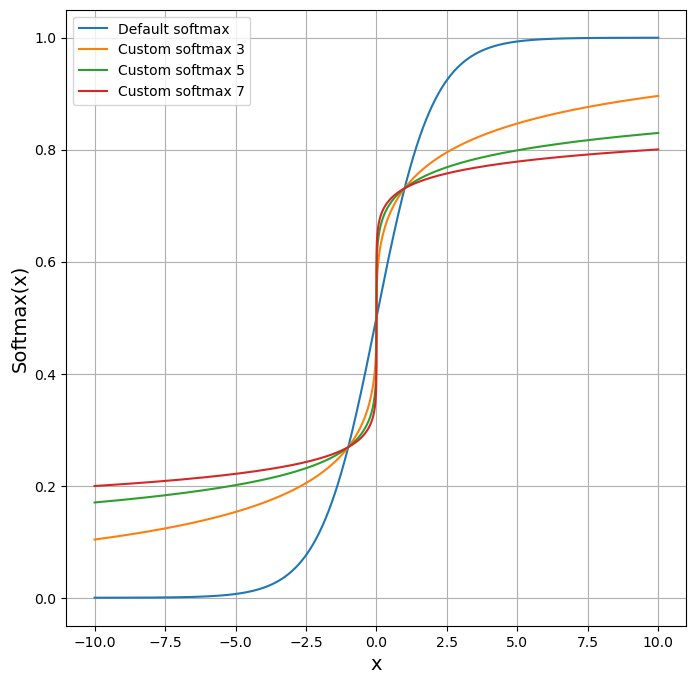

In [13]:
n = nn.Softmax(dim=1)
result0 = []
result1 = []
result2 = []
result3 = []
result4 = []
result5 = []
rnge =  np.arange(-10,10,0.001)
for i in rnge:
    result0.append(n(torch.FloatTensor([[i, 0]]))[0].data[0])
    result2.append(lossFunctions.testSoftmax(torch.FloatTensor([[i, 0]]), 3)[0].data[0])
    result3.append(lossFunctions.testSoftmax(torch.FloatTensor([[i, 0]]), 5)[0].data[0])
    result4.append(lossFunctions.testSoftmax(torch.FloatTensor([[i, 0]]), 7)[0].data[0])
    
plt.figure(figsize=(8,8))
plt.plot(rnge, result0, label="Default softmax")
plt.plot(rnge, result2, label="Custom softmax 3")
plt.plot(rnge, result3, label="Custom softmax 5")
plt.plot(rnge, result4, label="Custom softmax 7")
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('Softmax(x)', fontsize=14)
plt.legend()
plt.show()